In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats.stats import spearmanr
from scipy.stats import f_oneway
from pylab import savefig

df = pd.read_csv('C:\data\corona\df13.csv', sep=',')
print(df.columns)
print(df.dtypes)

Index(['date', 'county-identifier', 'county', 'area in sq. km',
       'total population', 'population per sq. km', 'percentage of infected',
       'average unemployment rate 2019',
       'disposable income per inhabitant (€)', 'CDU%', 'SPD%', 'FDP%', 'AfD%',
       'Bündnis 90/Die Grünen%', 'DIE LINKE%', 'PIRATEN%', 'other parties%',
       'school lessons', 'university lectures',
       'obligation to wear a mask in shops', 'restaurants',
       'number of guests at a wedding',
       'number of people you can meet in public', 'mean infection rate-7d',
       'mean infection rate-14d', 'change of infection rate'],
      dtype='object')
date                                        object
county-identifier                            int64
county                                      object
area in sq. km                             float64
total population                             int64
population per sq. km                        int64
percentage of infected                     flo

area in sq. km
(-0.06968084789243992, 5.648158114028949e-19)


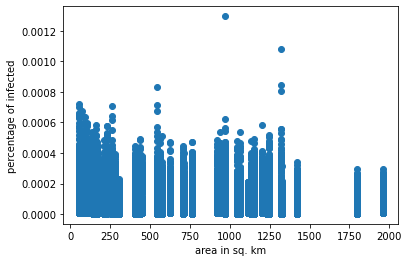

total population
(-0.05096704233753671, 7.760381292430458e-11)


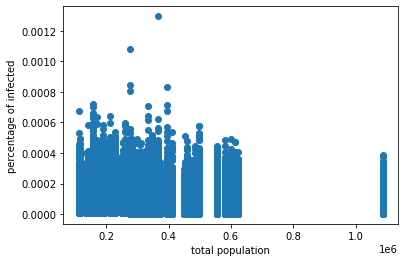

population per sq. km
(0.04734780904744811, 1.5156168704582406e-09)


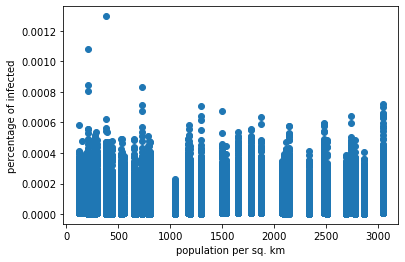

average unemployment rate 2019
(0.07528564200283308, 6.812285789029426e-22)


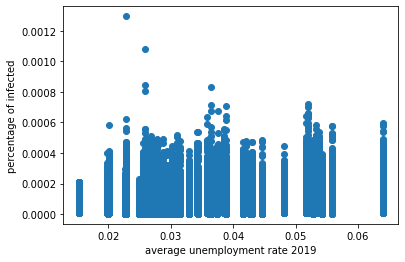

disposable income per inhabitant (€)
(-0.06374614662423962, 3.9782014052791824e-16)


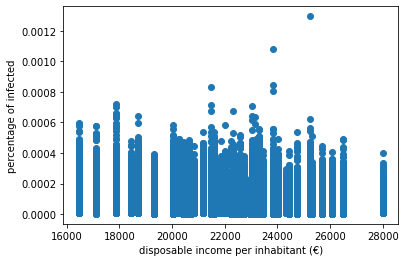

CDU%
(-0.07048636919864112, 2.219027499930527e-19)


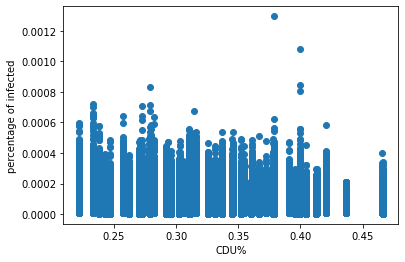

SPD%
(0.08706590810307305, 9.316232437067575e-29)


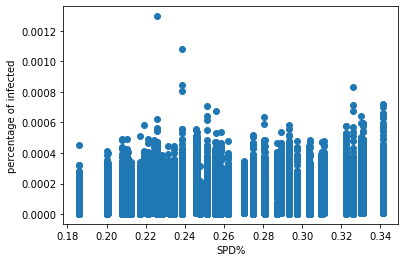

FDP%
(-0.07900472110994752, 5.9337416305097e-24)


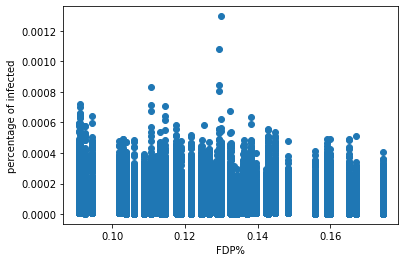

AfD%
(0.09905867093119214, 9.091508958998129e-37)


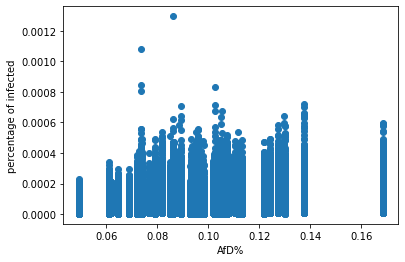

Bündnis 90/Die Grünen%
(-0.04855619668802751, 5.751557686911131e-10)


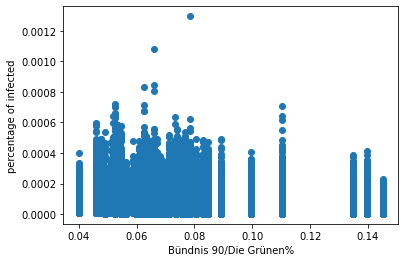

DIE LINKE%
(0.01473972220004217, 0.06008321778431273)


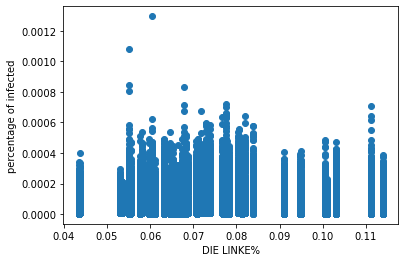

PIRATEN%
(0.07446776808395132, 1.875407773647234e-21)


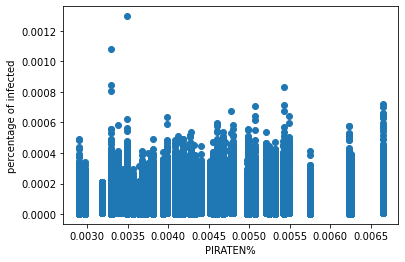

other parties%
(0.08368453472221615, 1.098983793534428e-26)


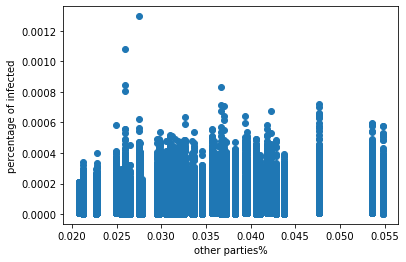

In [2]:
numeric_attributes = ['area in sq. km', 'total population', 'population per sq. km',
                      'average unemployment rate 2019', 'disposable income per inhabitant (€)', 
                      'CDU%', 'SPD%', 'FDP%', 'AfD%', 'Bündnis 90/Die Grünen%', 'DIE LINKE%', 'PIRATEN%', 
                      'other parties%']
for numeric_a in numeric_attributes:
        print(numeric_a)
        print(pearsonr(df[numeric_a], df['percentage of infected']))
        plt.scatter(df[numeric_a], df['percentage of infected'])
        plt.ylabel('percentage of infected')
        plt.xlabel(numeric_a)
        plt.show()

In [3]:
print(df['restaurants'].unique())

['open' 'open with restrictions' 'closed']


In [4]:
print(f_oneway(df['percentage of infected'][df['restaurants'] == "open"],
         df['percentage of infected'][df['restaurants'] == "open with restrictions"],
         df['percentage of infected'][df['restaurants'] == 'closed']))

print(df['school lessons'].unique())

F_onewayResult(statistic=2439.9677698027467, pvalue=0.0)
['in-class lessons without masks' 'online' 'holidays'
 'in-class lessons for graduation classes'
 'part-time in-class lessons for primary school pupils and last three oldest classes of secondary schools'
 'part-time in-class lessons' 'in-class lessons with masks'
 'in-class lessons, partially with masks'
 'in-class lessons, for primary school pupils without masks']


In [5]:
#kann den Fehler nicht finden
print(f_oneway(df['percentage of infected'][df['school lessons'] == 'in-class lessons without masks'],
         df['percentage of infected'][df['school lessons'] == 'online'],
         df['percentage of infected'][df['school lessons'] == 'holidays'],
         df['percentage of infected'][df['school lessons'] == 'in-class lessons for graduation classes'],
         df['percentage of infected'][df['school lessons'] == 'part-time in-class lessons for primary school pupils and last three oldest classes of secondary schools'],
         df['percentage of infected'][df['school lessons'] == 'part-time in-class lessons' 'in-class lessons with masks'],
         df['percentage of infected'][df['school lessons'] == 'in-class lessons, partially with masks'],
         df['percentage of infected'][df['school lessons'] == 'in-class lessons, for primary school pupils without masks']))

F_onewayResult(statistic=nan, pvalue=nan)


C:\Users\larak\anaconda3\lib\site-packages\scipy\stats\stats.py:3612: F_onewayBadInputSizesWarning: at least one input has length 0
  warnings.warn(F_onewayBadInputSizesWarning('at least one input '


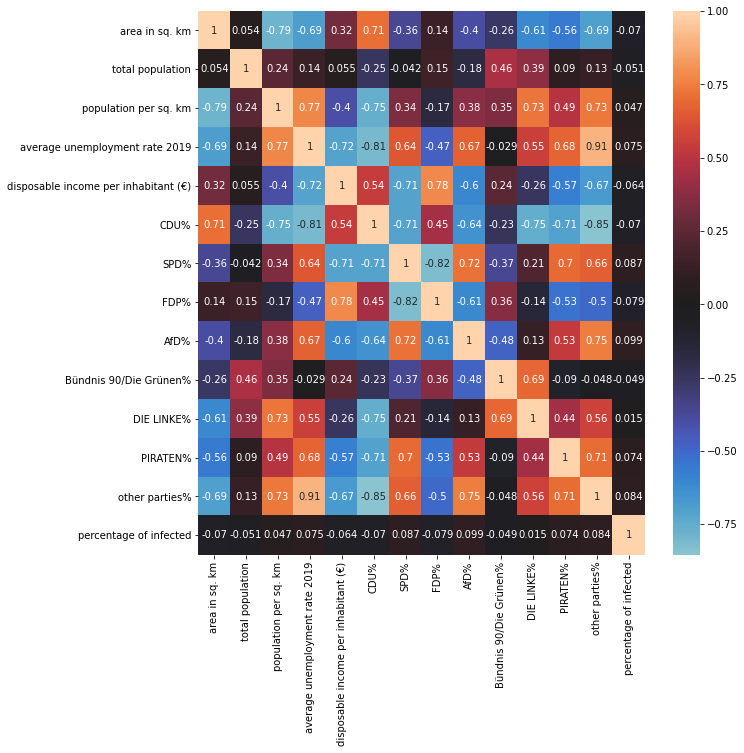

Index(['date', 'county-identifier', 'county', 'area in sq. km',
       'total population', 'population per sq. km', 'percentage of infected',
       'average unemployment rate 2019',
       'disposable income per inhabitant (€)', 'CDU%', 'SPD%', 'FDP%', 'AfD%',
       'Bündnis 90/Die Grünen%', 'DIE LINKE%', 'PIRATEN%', 'other parties%',
       'school lessons', 'university lectures',
       'obligation to wear a mask in shops', 'restaurants',
       'number of guests at a wedding',
       'number of people you can meet in public', 'mean infection rate-7d',
       'mean infection rate-14d', 'change of infection rate'],
      dtype='object')


In [6]:
c = numeric_attributes + ["percentage of infected"]
plt.figure(figsize=(10, 10))
cor = df[c].corr(method = 'pearson')
heatmap = sns.heatmap(cor, center=0,annot=True, xticklabels=1, yticklabels=1)
plt.savefig("C:\data\corona\heatmap.jpeg")
plt.show()

print(df.columns)

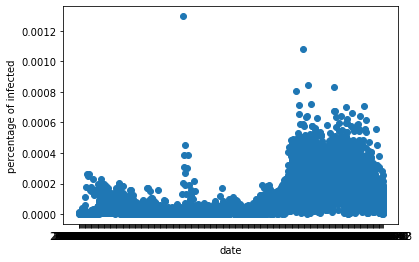

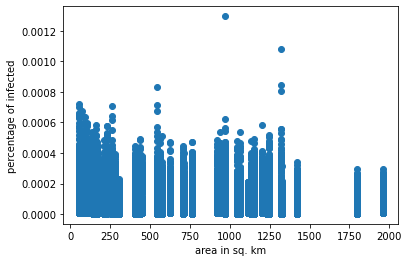

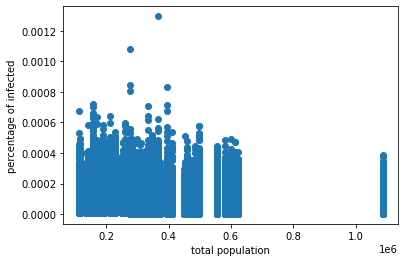

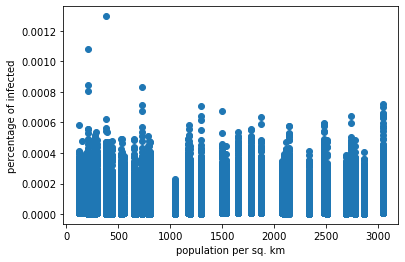

KeyError: 'average number of unemployed people 2019'

In [7]:
variables = ['date', 'area in sq. km', 'total population', 'population per sq. km',
             'average number of unemployed people 2019', 'disposable income per inhabitant (€)', 'CDU%', 'SPD%', 
             'FDP%', 'AfD%', 'Bündnis 90/Die Grünen%', 'DIE LINKE%', 'PIRATEN%', 'other parties%']
for v in variables:
    plt.scatter(df[v], df["percentage of infected"])
    plt.xlabel(v)
    plt.ylabel('percentage of infected')
    plt.show()

In [ ]:
measures = ['school lessons', 'university lectures', 'obligation to wear a mask in shops', 'restaurants',
           'number of guests at a wedding', 'number of people you can meet in public']
for m in measures:
    sns.scatterplot(x=df['date'], y=df['percentage of infected'], hue=df[m], s=10)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    #plt.savefig("C:\data\m.jpeg")
    plt.show()